In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/rock_density_xray.csv")
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [3]:
df.columns = ['Signal', 'Density']
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


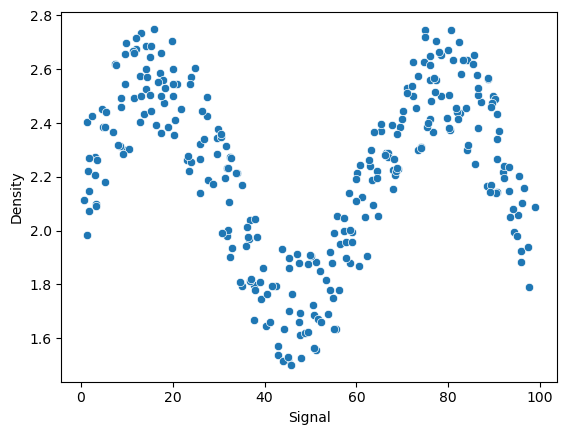

In [6]:
sns.scatterplot(data = df, x = 'Signal', y = 'Density');

In [30]:
X = df.drop('Density', axis =  1)
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [32]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
preds = linear_model.predict(X_test)


In [33]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error
rmse = root_mean_squared_error(y_test, preds)
print(rmse)



0.2928014017261052


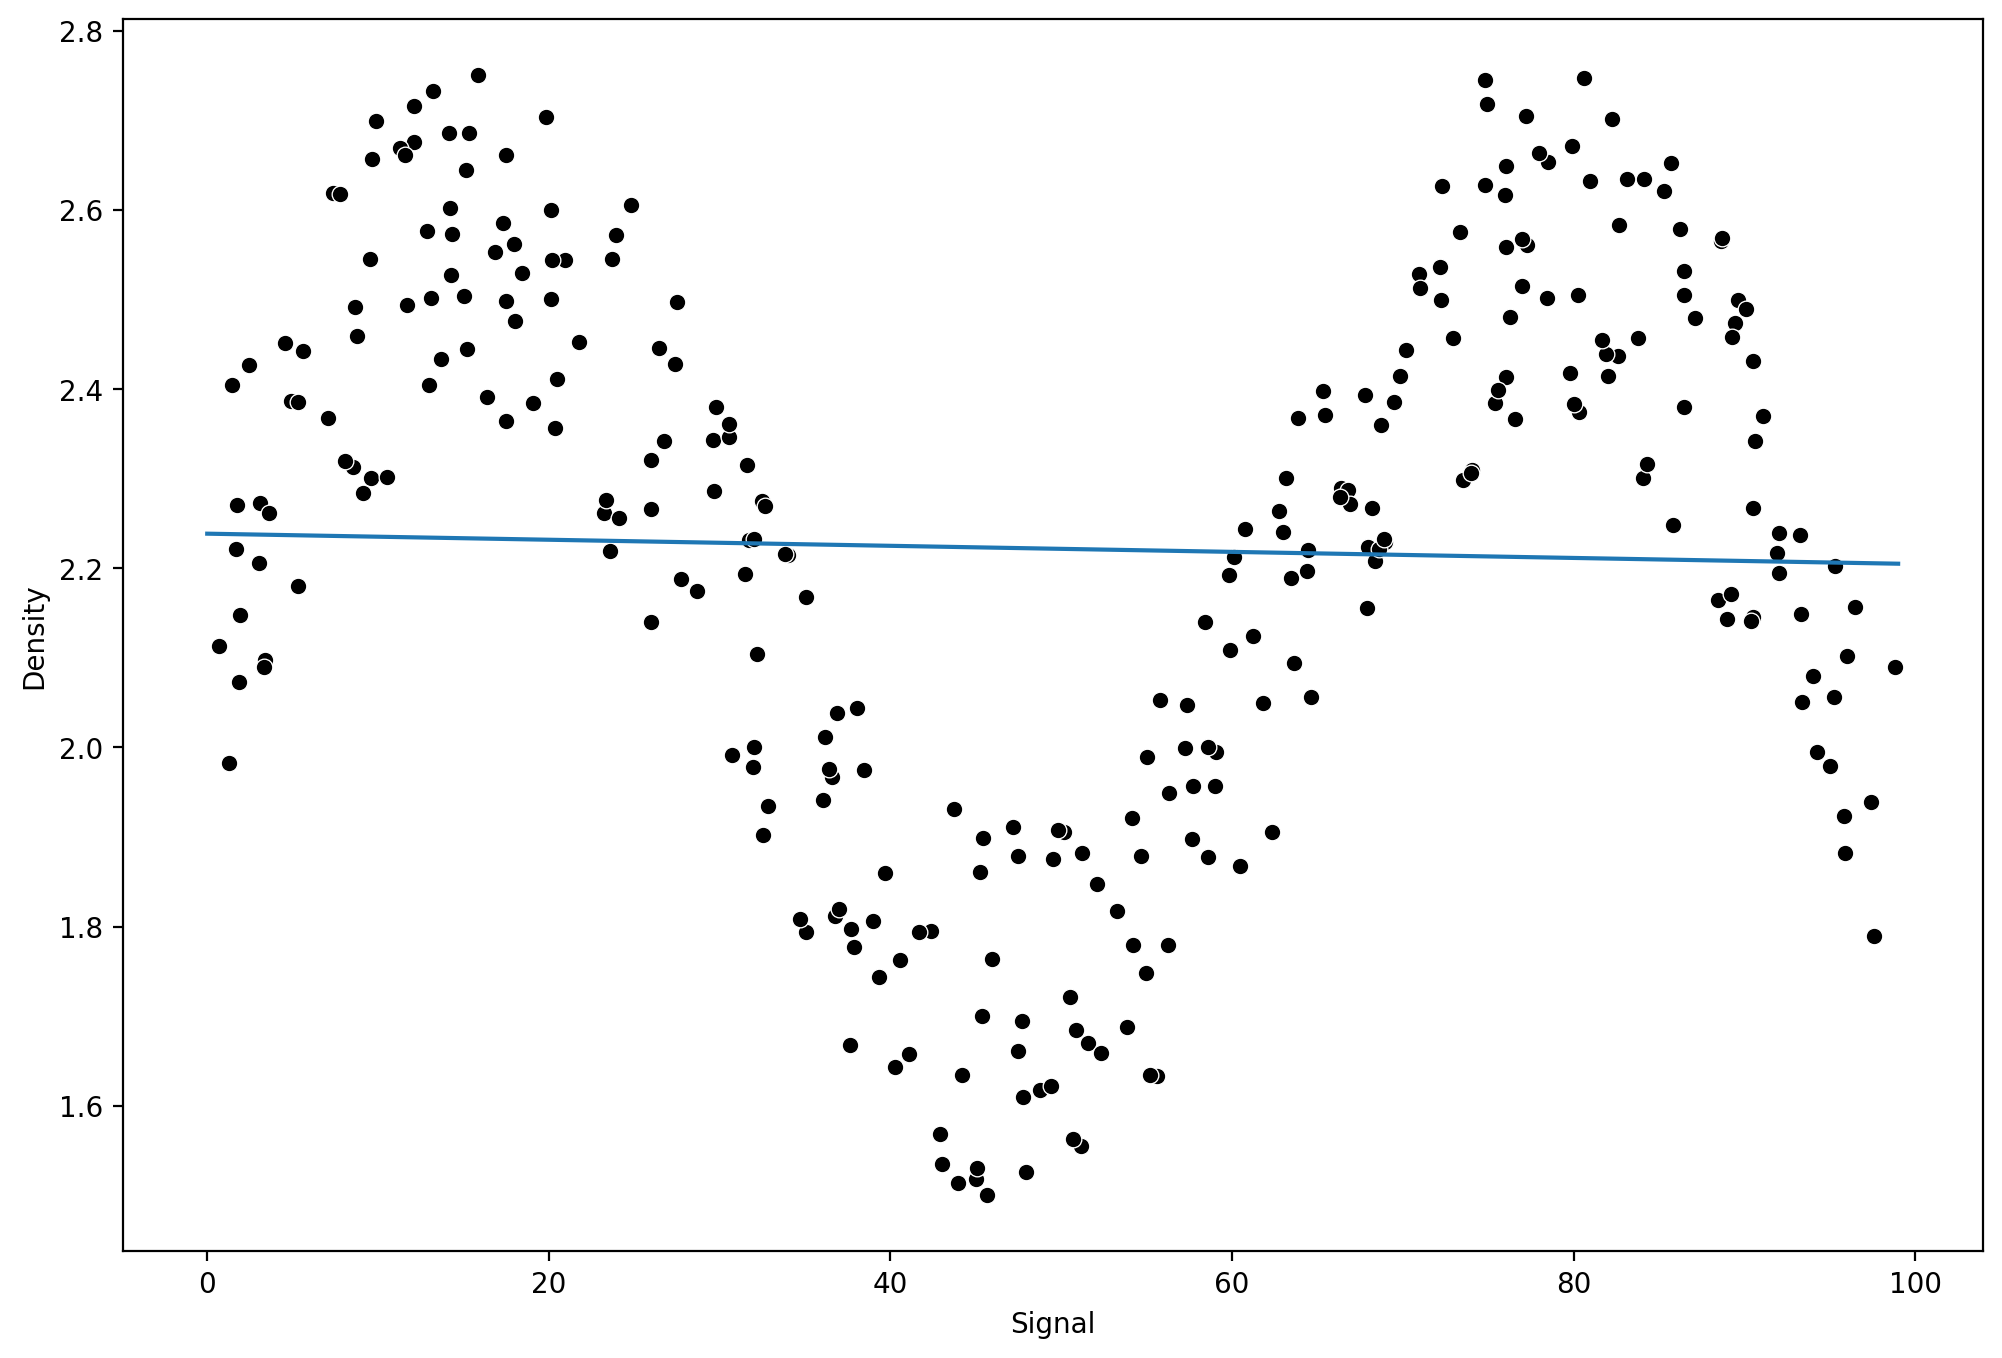

In [34]:
signal_range = np.arange(0,100)
lr_output = linear_model.predict(signal_range.reshape(-1,1))
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output);

In [35]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE : 0.2928014017261052


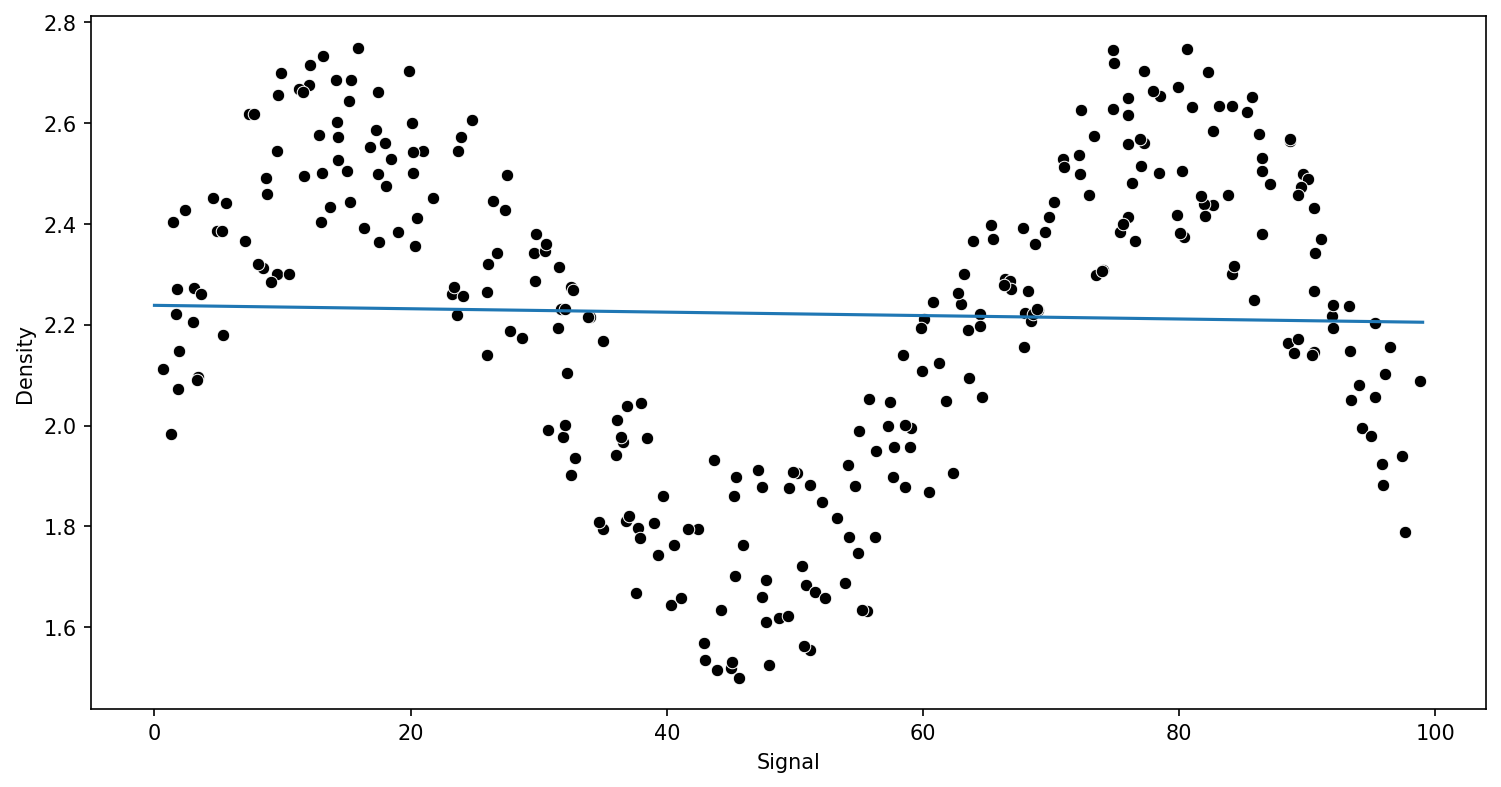

In [36]:
model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

RMSE : 0.2855173191826419


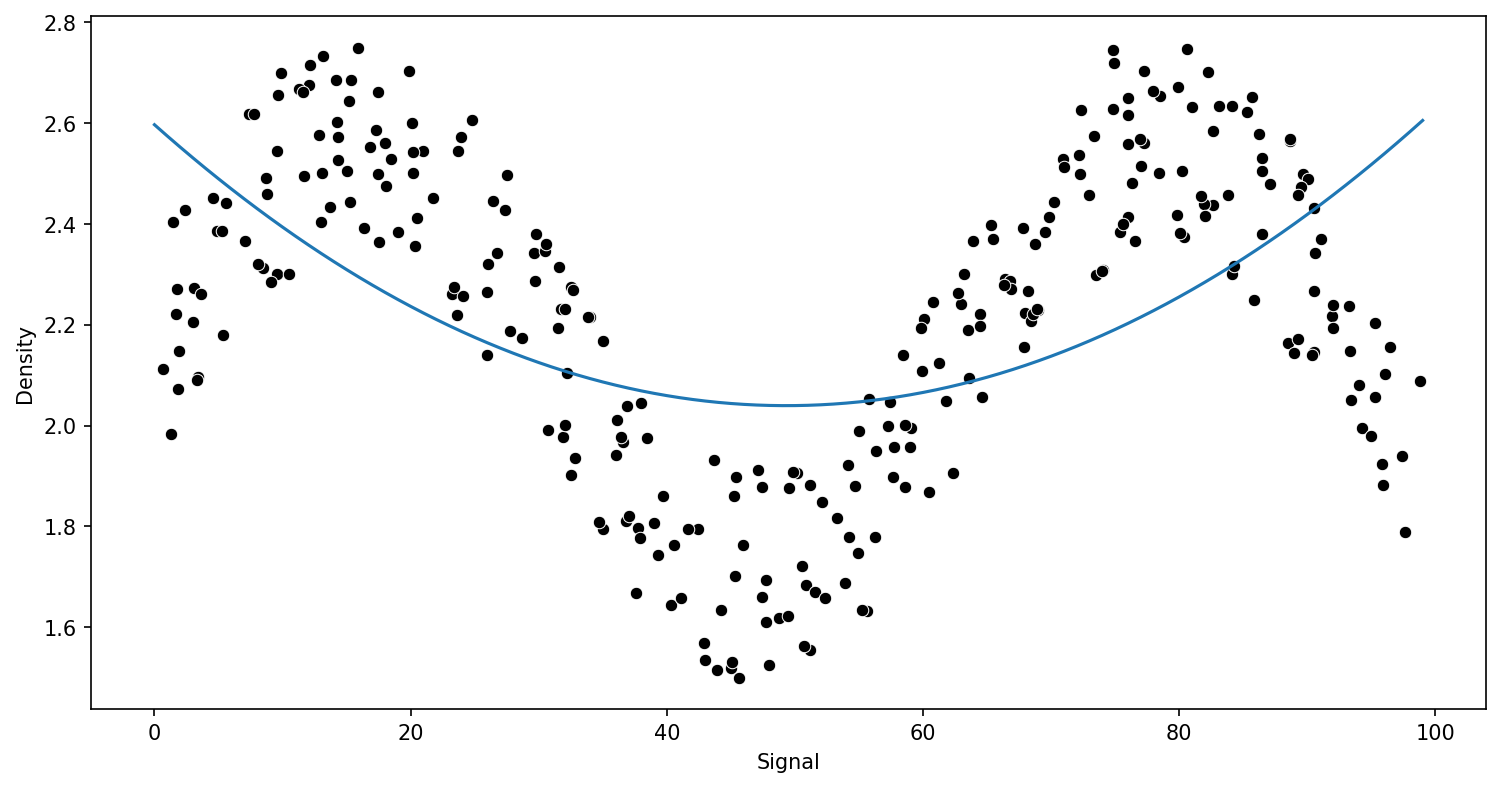

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

RMSE : 0.16153547162673088
RMSE : 0.1400166117231861
RMSE : 0.1408050741503751


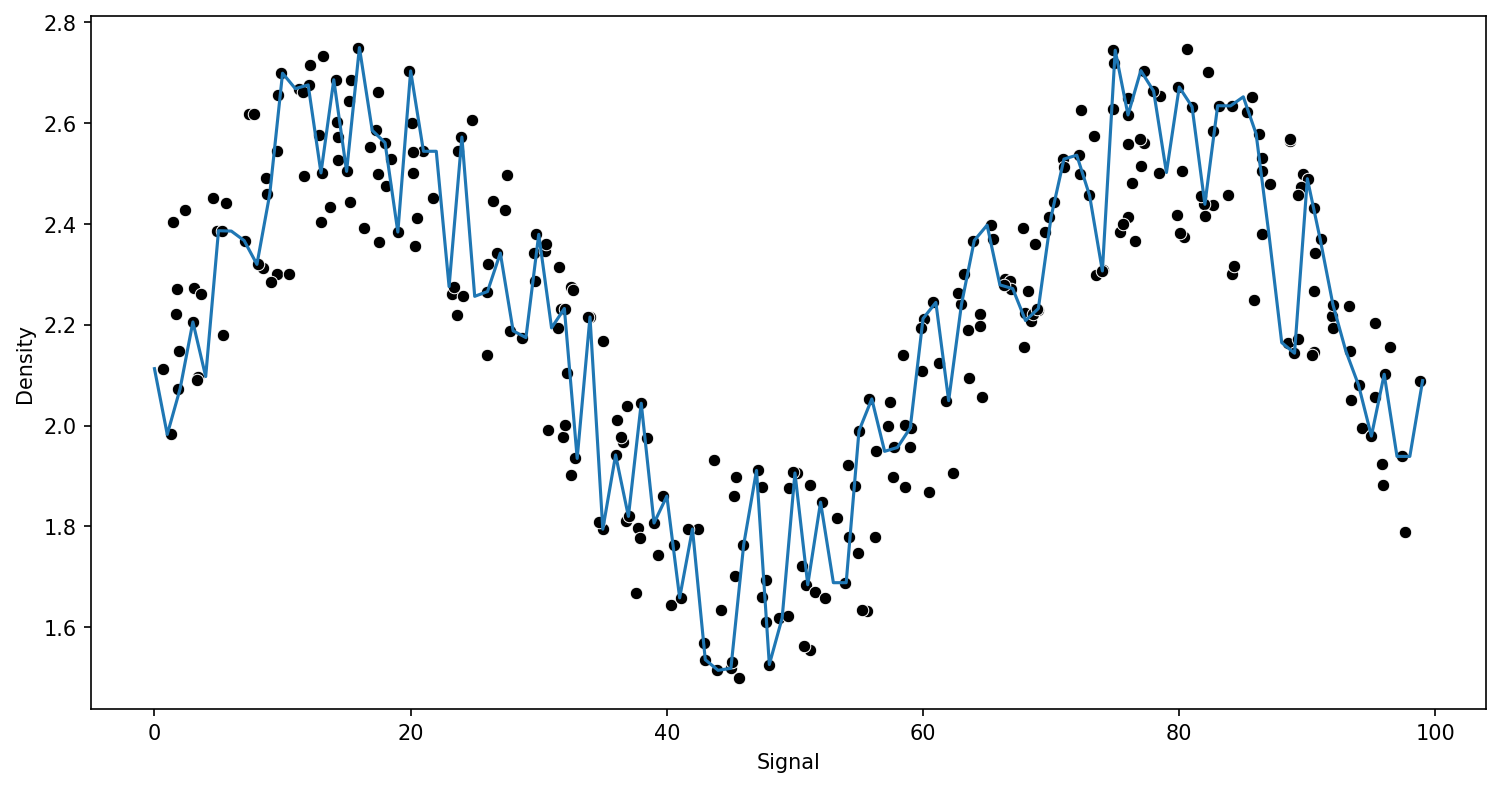

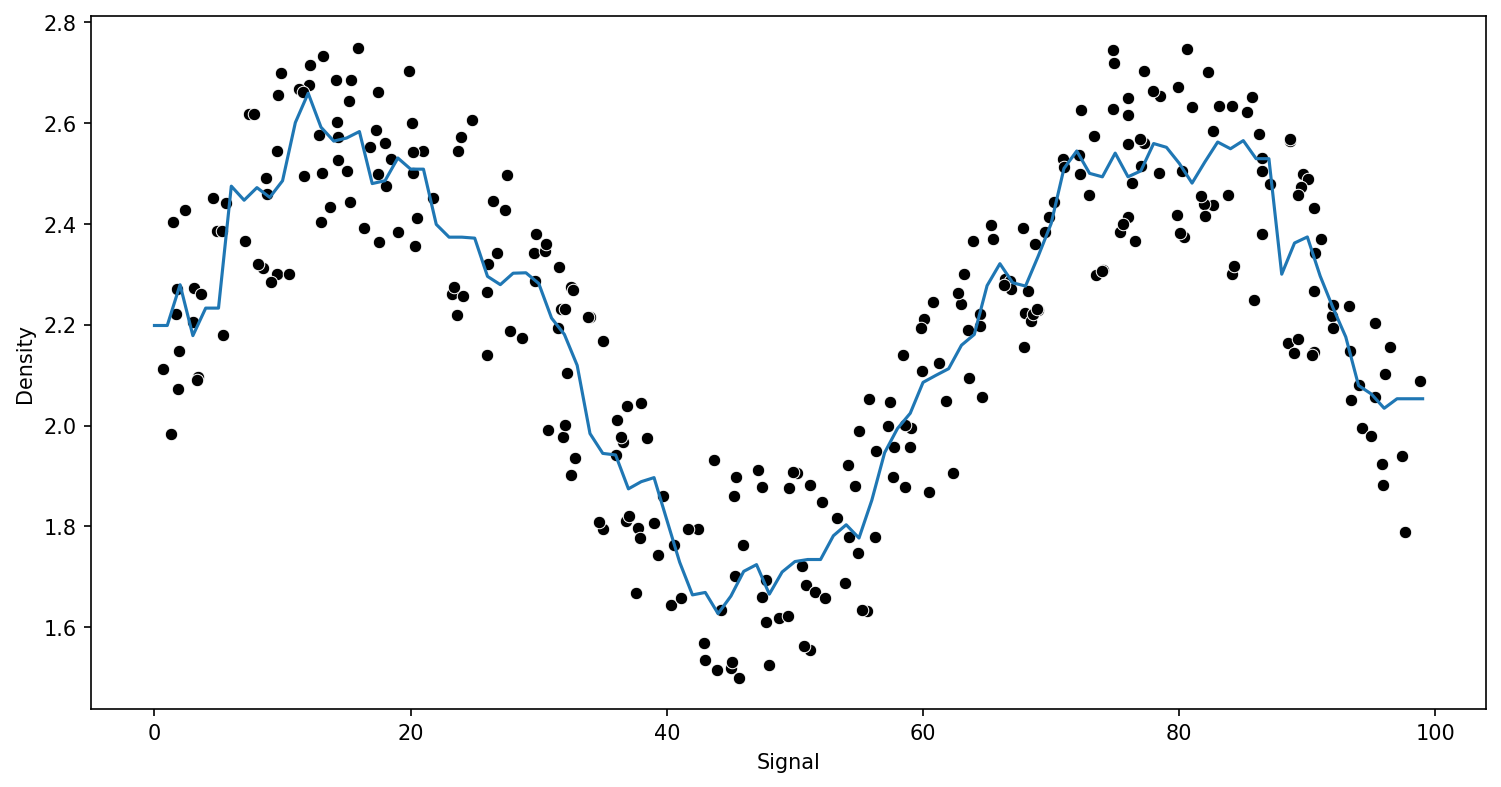

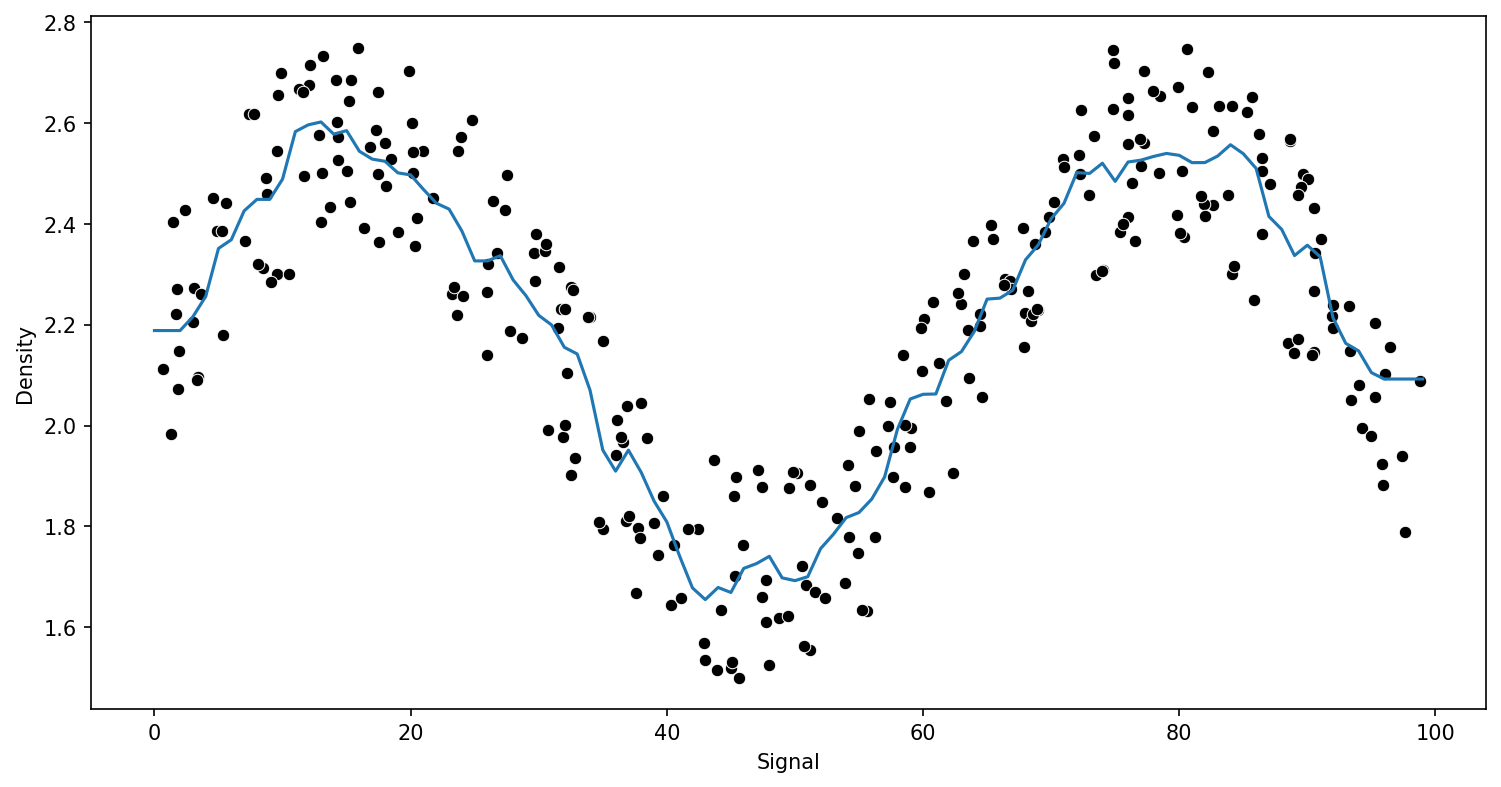

In [38]:
from sklearn.neighbors import KNeighborsRegressor
preds = {}
k_values = [1,5,10]
for n in k_values:
    
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

RMSE : 0.16153547162673088


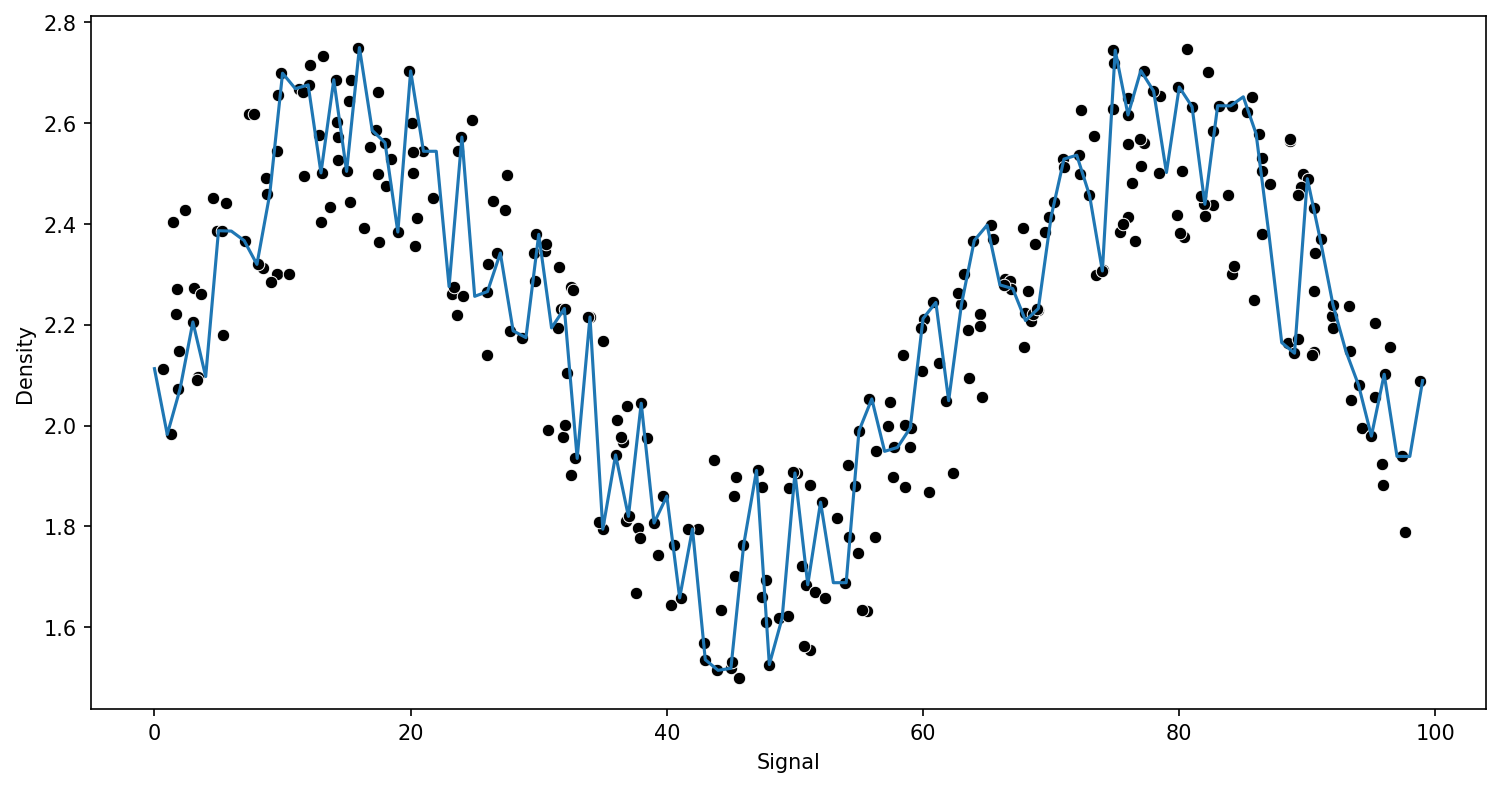

In [39]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

RMSE : 0.13004609494557567


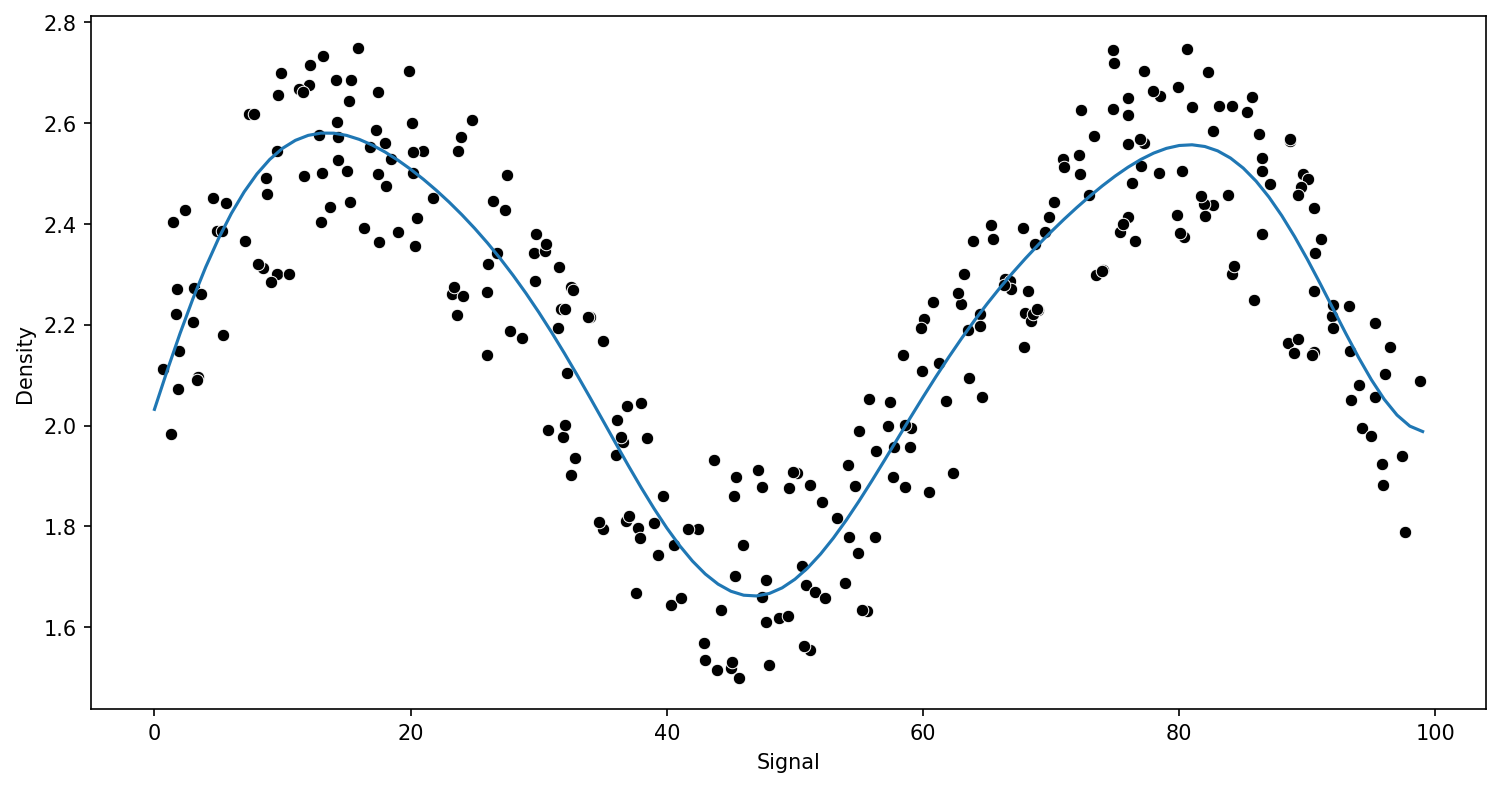

In [40]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()
grid = GridSearchCV(svr,param_grid)
run_model(grid,X_train,y_train,X_test,y_test)

RMSE : 0.13919543427127679
RMSE : 0.1426482376280345
RMSE : 0.14065357721588262


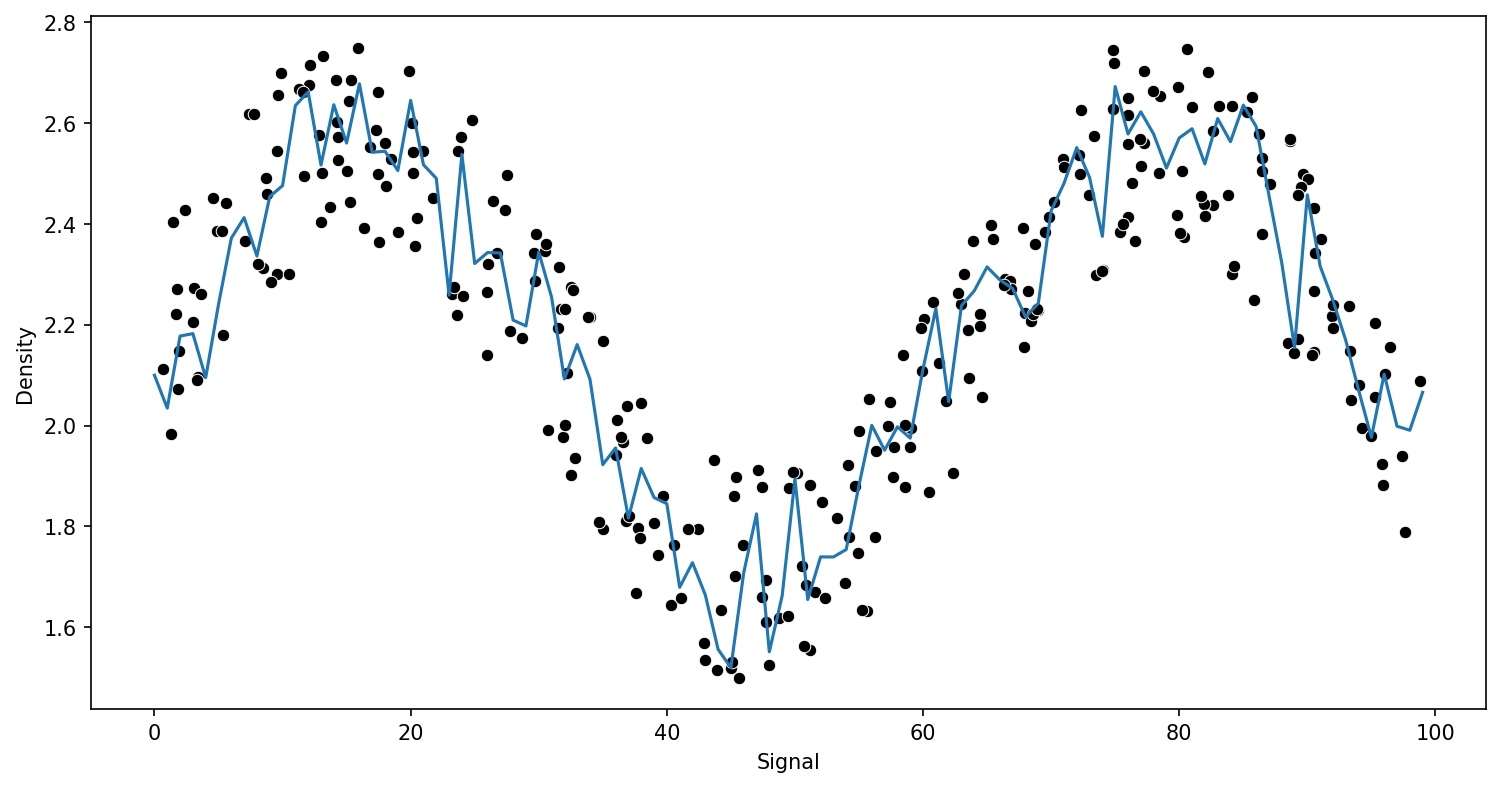

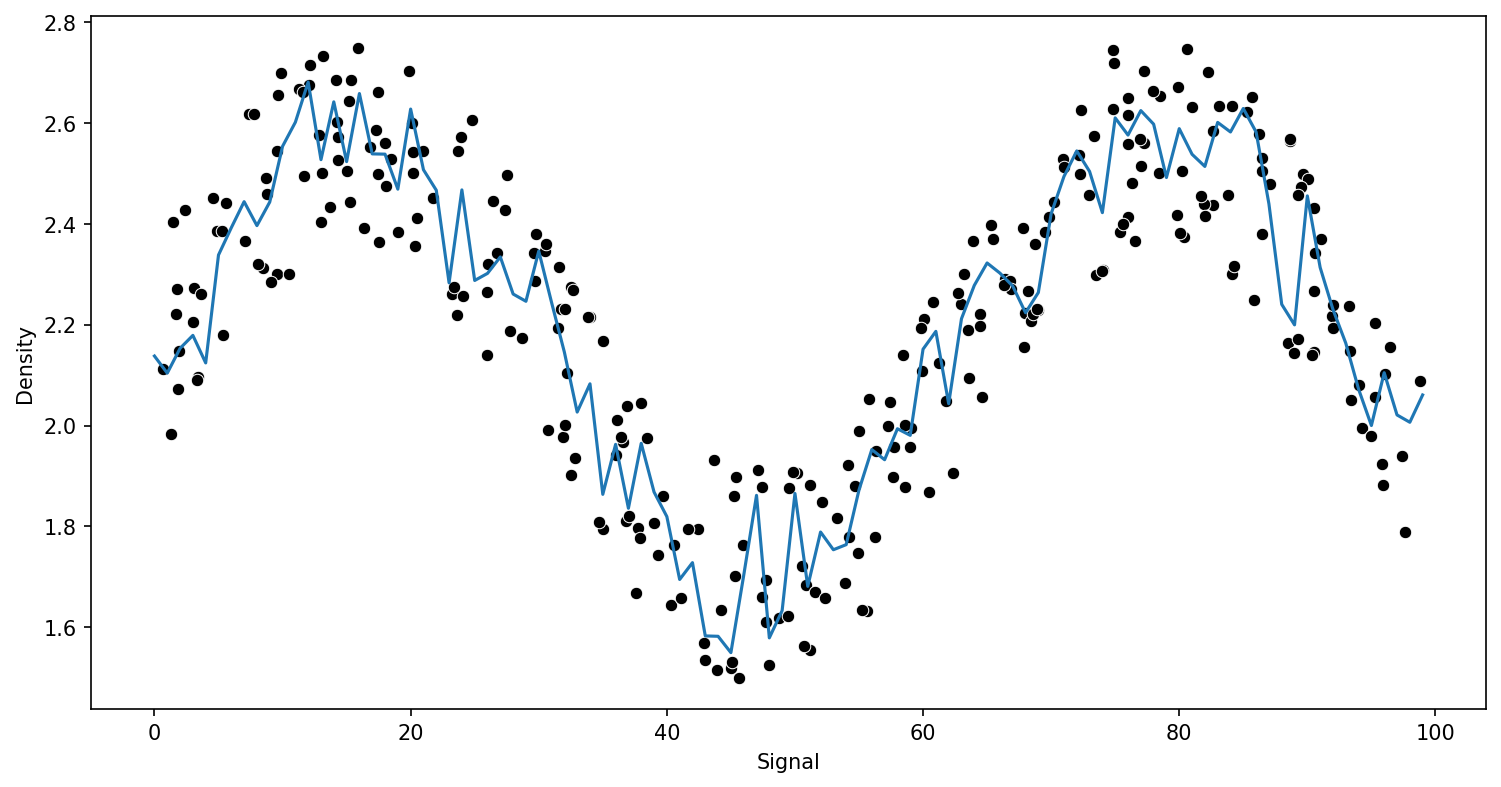

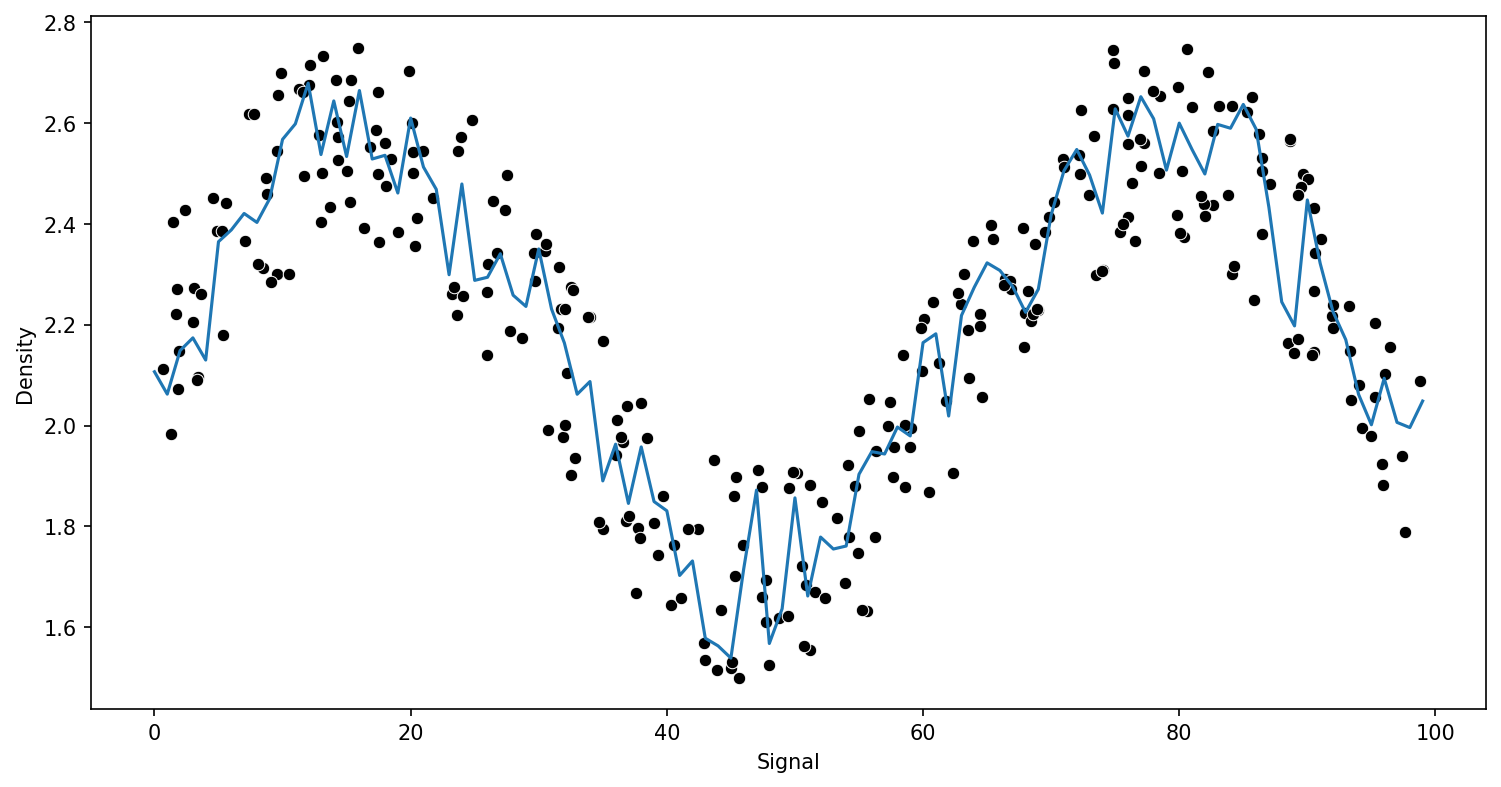

In [41]:
from sklearn.ensemble import RandomForestRegressor
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)


RMSE : 0.13336766447799286


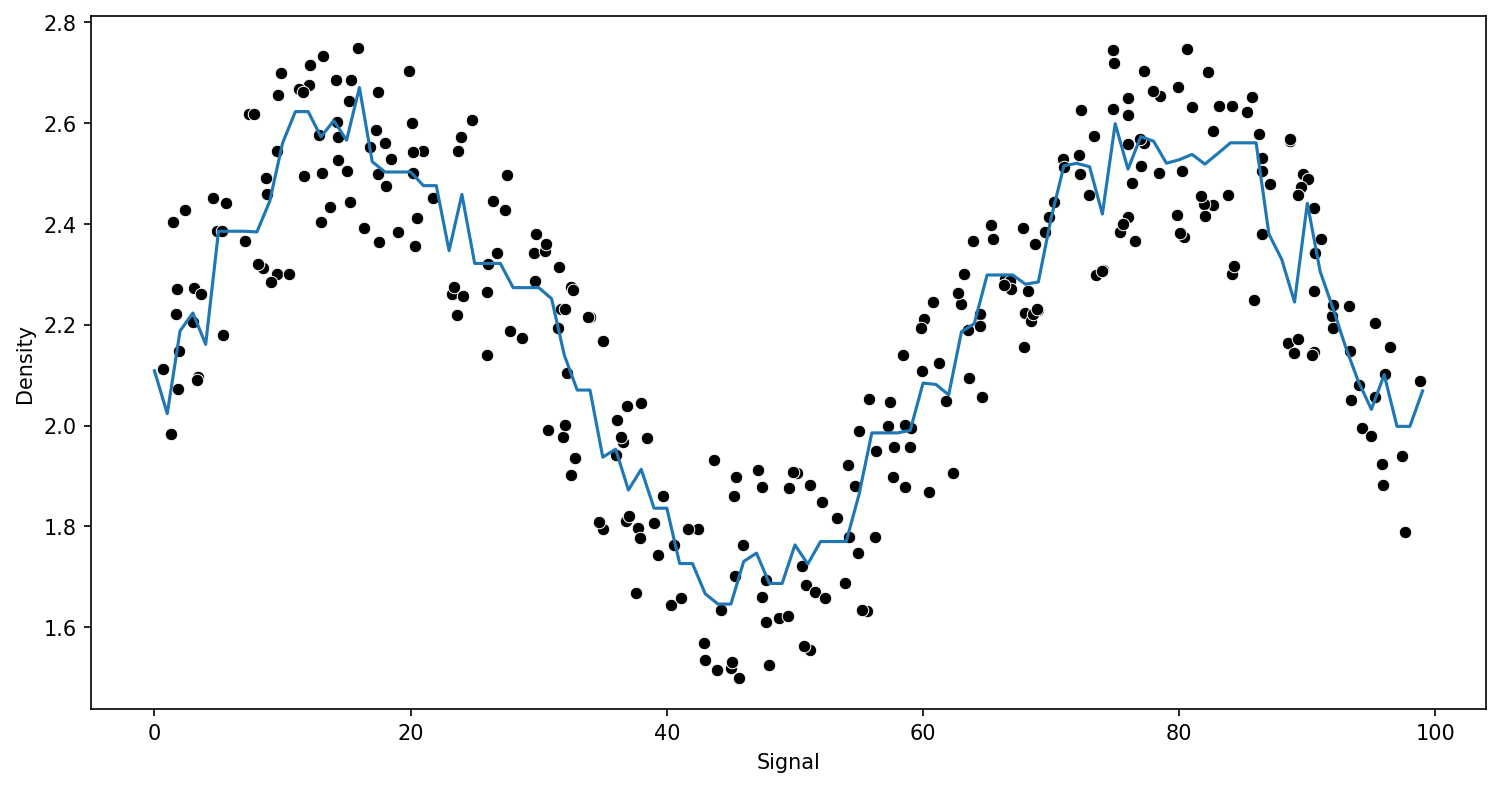

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

RMSE : 0.13336766447799286


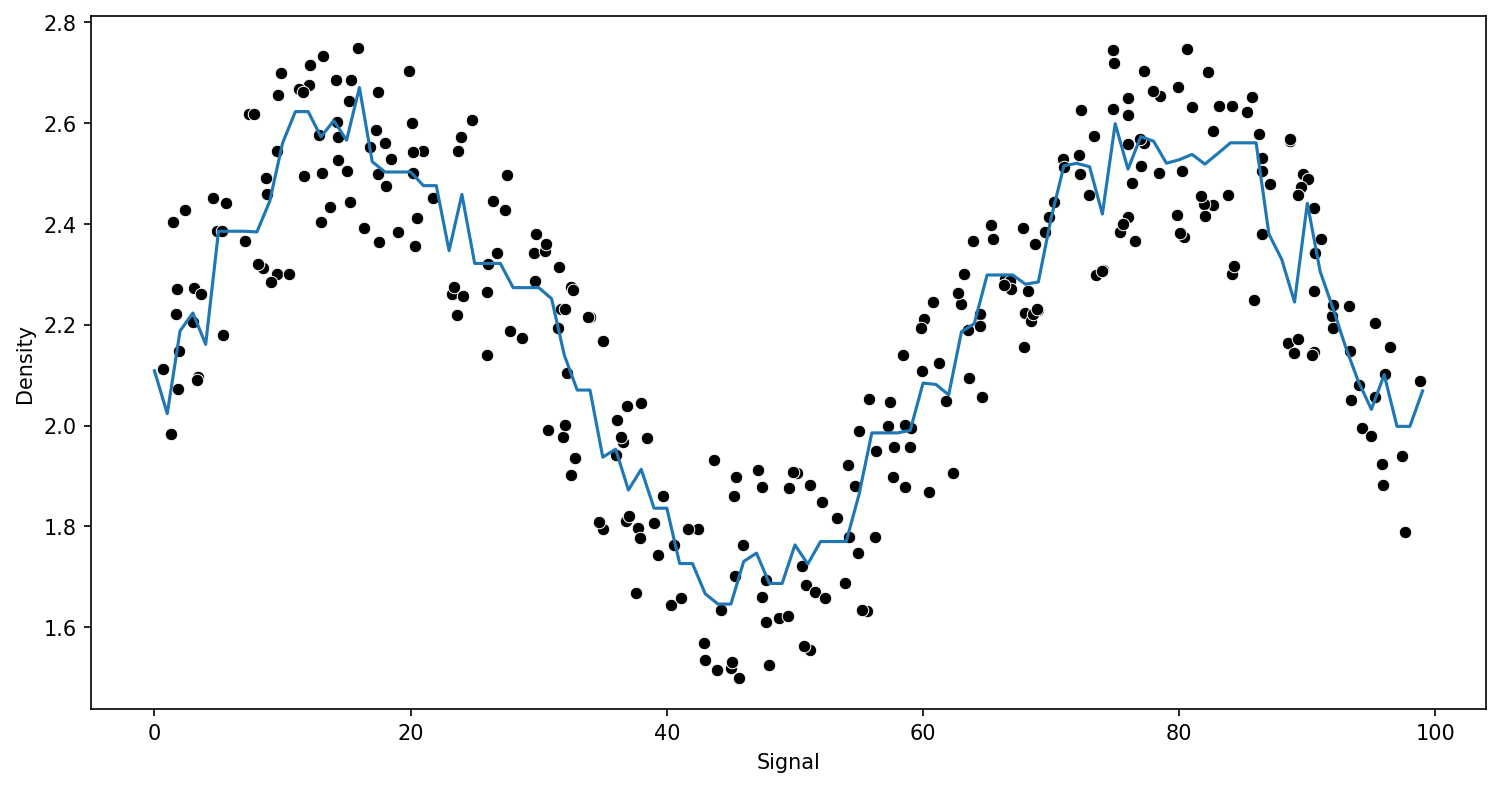

In [43]:
from sklearn.ensemble import AdaBoostRegressor
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)